In [55]:
# importar bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import Config
from src.data_processing import DataDict, ItemDict
import json
from matplotlib.ticker import ScalarFormatter


pd.set_option("display.width", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)


from IPython.display import display

In [2]:
# diretório dos dados
data_dirs = Config.get_path_dir_data()
# caminho para o arquivo csv da variáveis e suas categorias
path_dict = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]

# caminho para os microdados do enem 2023
path_microdados = data_dirs["DADOS"]["MICRODADOS_ENEM_2023.csv"]
# caminho para os itens das provas
path_itens = data_dirs["DADOS"]["ITENS_PROVA_2023.csv"]

# Caminho para o dicionário de variveis dos microdados
path_dict_microdados = data_dirs["DICIONÁRIO"]["MICRODADOS_ENEM_2023.csv"]
# Caminho para o dicionário de variveis dos microdados
path_dict_itens = data_dirs["DICIONÁRIO"]["ITENS_PROVA_2023.csv"]

In [3]:
dir_data = data_dirs["DADOS"]
dir_parquet_data = dir_data["MICRODADOS_ENEM_2023_parquet"]
path_parquet_file = dir_data["MICRODADOS_ENEM_2023.parquet"]
path_parquet_itens = dir_data["ITENS_PROVA_2023.parquet"]

In [4]:
list_parquet = list(dir_parquet_data.list_file().values())

## **Dicionário das variáveis**

In [5]:
dict_microdados = DataDict(path_dict_microdados)
dict_itens = ItemDict(path_dict_itens)

## **Carregar dados**

### **Carregar Microdado enem**

In [6]:
df = pd.read_parquet(path_parquet_file)

### **Carregar Itens**

In [7]:
df_items = pd.read_parquet(path_parquet_itens)

# **Perguntas**

## **Como se distribuem as notas como um todo?**

In [ ]:
# data frame com as variáveis de interesse
variaveis = [var for var in dict_microdados.tabel["Nome da variavel"].values if "NU_NOTA" in var]
df_notas = df[variaveis].dropna()
df_notas = df_notas[df_notas[variaveis] > 0]

In [25]:
table_dict_microdados = dict_microdados.tabel

In [16]:
def get_tukey(series : pd.Series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    media = np.mean(series)

    return limite_inferior, media, limite_superior

In [63]:
import textwrap

def plot_notas_tukey(series: pd.Series, 
                     legenda: str,
                     inf: float = None,
                     media: float = None, 
                     sup: float = None,
                     set_ci: bool = False,
                     max_title_length: int = 40):  # <- novo parâmetro para quebra
    
    ax = series.hist(bins=200, edgecolor='black')

    if media is not None:
        plt.axvline(media, color="yellow", linestyle='dashed', linewidth=2, label=f"Média: {media:.2f}")
    if inf is not None:
        plt.axvline(inf, color='red', linestyle='dashed', linewidth=2, label=f'Limite Inferior Tukey:\n{inf:.2f}')
    if sup is not None:
        plt.axvline(sup, color='green', linestyle='dashed', linewidth=2, label=f'Limite Superior Tukey:\n{sup:.2f}')

    if set_ci:
        from matplotlib.ticker import ScalarFormatter
        formatter = ScalarFormatter()
        formatter.set_scientific(False)
        ax.yaxis.set_major_formatter(formatter)

    # Quebra automática do título se for muito longo
    titulo = f'Distribuição da {legenda}'
    titulo_quebrado = "\n".join(textwrap.wrap(titulo, max_title_length))
    plt.title(titulo_quebrado)

    plt.xlabel('Nota')
    plt.ylabel('Frequência')
    plt.legend()
    plt.tight_layout()
    plt.show()


### **Matemática**

In [20]:
notas_matematica = df_notas["NU_NOTA_MT"]

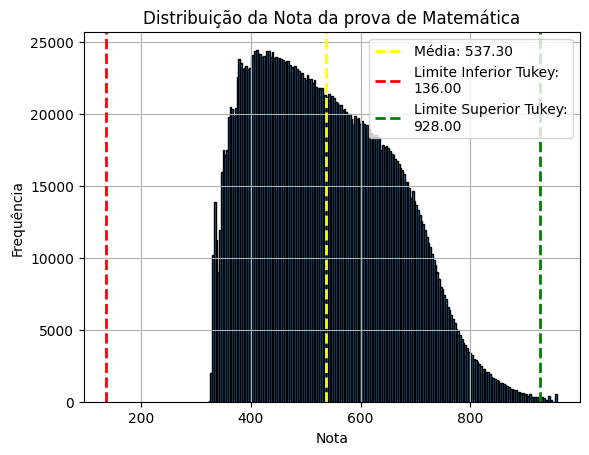

In [60]:
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == "NU_NOTA_MT"]["Descricao"].values[0]
inf, media, sup = get_tukey(notas_matematica)
plot_notas_tukey(notas_matematica,descricao, inf, media, sup)

##  Ciências da Natureza

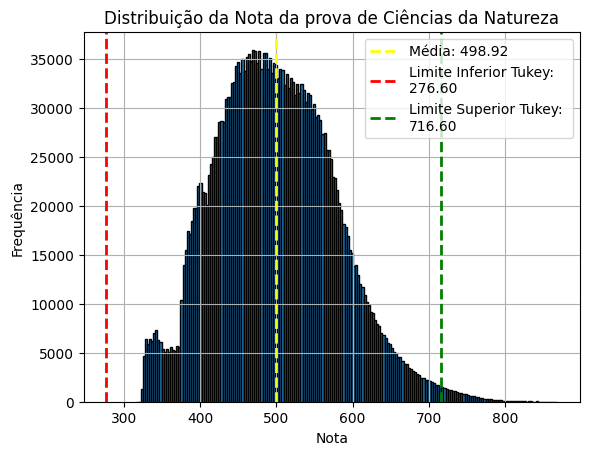

In [48]:
var = "NU_NOTA_CN"
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, descricao, inf, media, sup)

## Ciências humanas

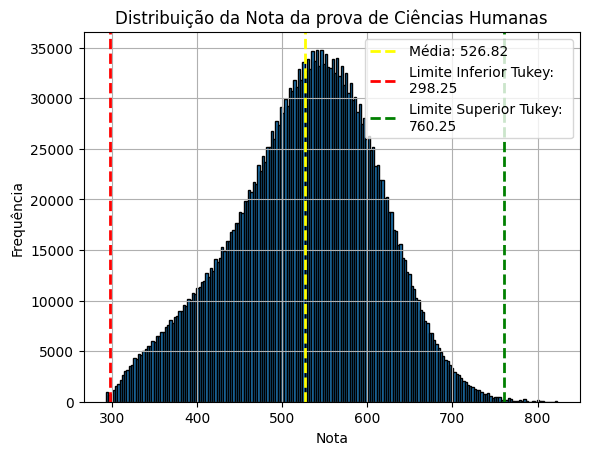

In [49]:
var = "NU_NOTA_CH"
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, descricao,  inf, media, sup)

## Linguágens

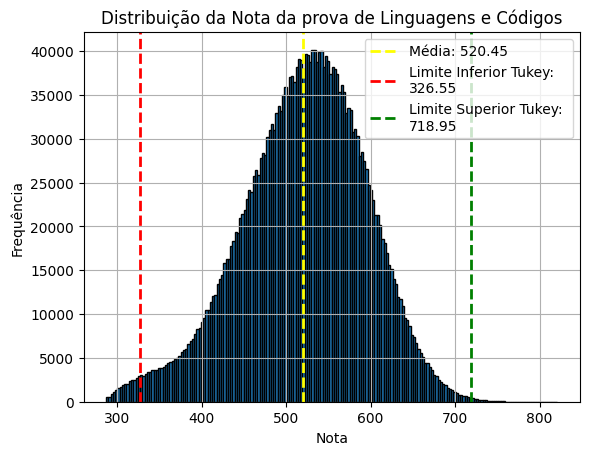

In [50]:
var = "NU_NOTA_LC"
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, descricao,  inf, media, sup)

## **Redação**

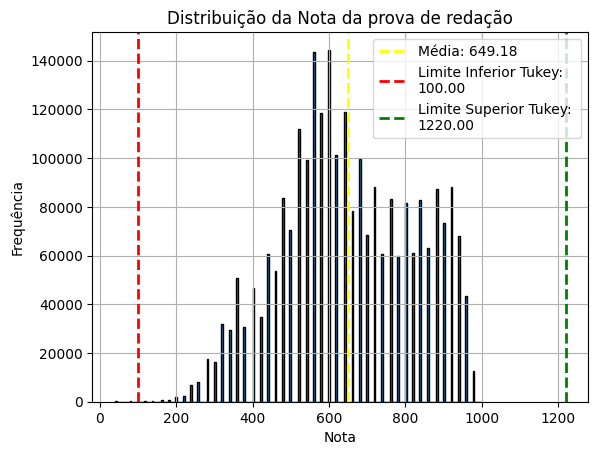

In [51]:
var = "NU_NOTA_REDACAO"
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, descricao, inf, media, sup)

## Competencias em redação

In [40]:
variaveis_comp = [var for var in variaveis if "COMP" in var] 
variaveis_comp

['NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

In [43]:
# notas para cada competencia
dict_notas_comp = {comp : df_notas[comp] for comp in variaveis_comp}

/tmp/ipykernel_4581/4096380412.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


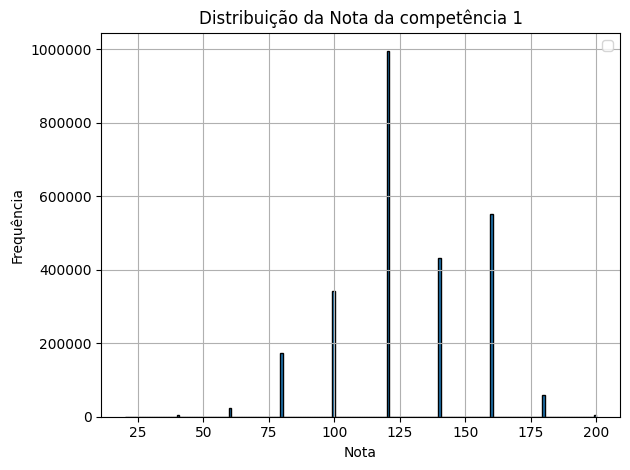

In [68]:
var = variaveis_comp[0]
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0].split("-")[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, descricao, set_ci=True)

/tmp/ipykernel_4581/4096380412.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


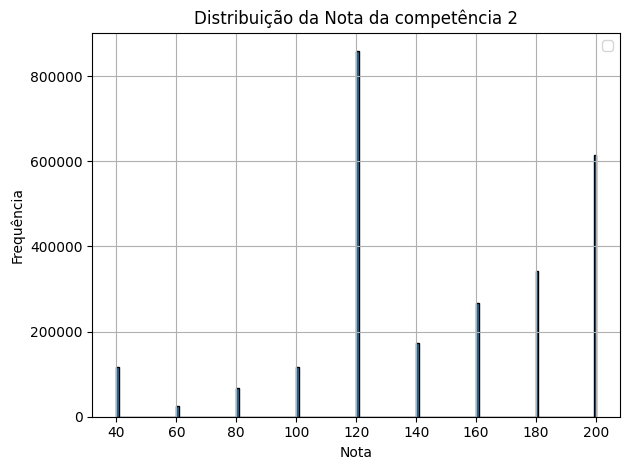

In [67]:
var = variaveis_comp[1]
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0].split("-")[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, descricao, set_ci=True, max_title_length=100)

/tmp/ipykernel_4581/4096380412.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


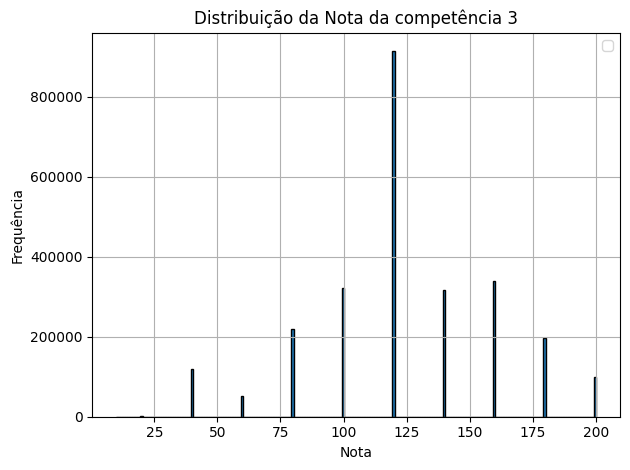

In [ ]:
var = variaveis_comp[2]
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0].split("-")[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, descricao, set_ci=True, max_title_length=100)

/tmp/ipykernel_4581/4096380412.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


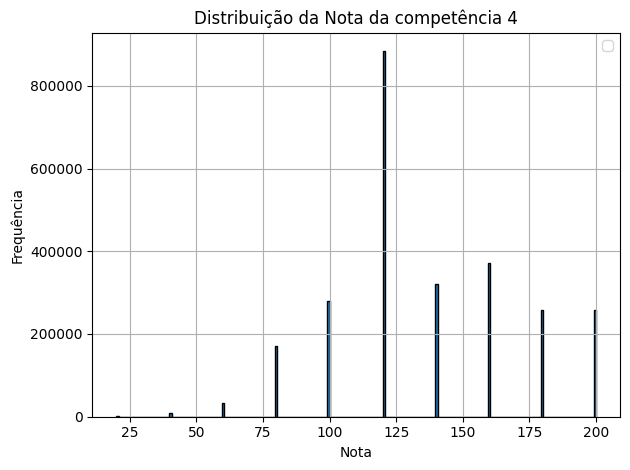

In [72]:
var = variaveis_comp[3]
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0].split("-")[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, descricao, set_ci=True, max_title_length=100)

/tmp/ipykernel_4581/4096380412.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


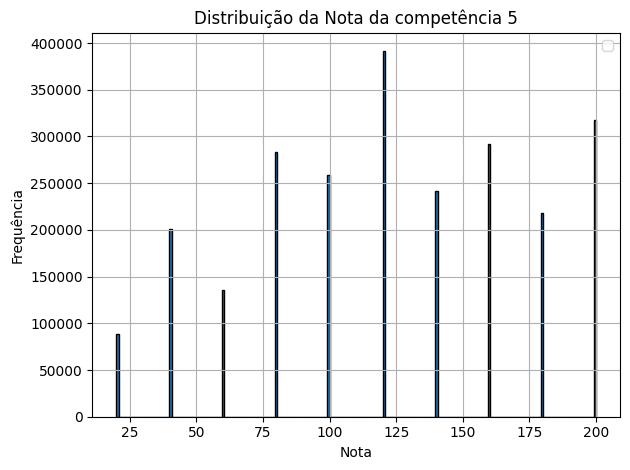

In [70]:
var = variaveis_comp[4]
notas = df_notas[var]
descricao = table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0].split("-")[0]
inf, media, sup = get_tukey(notas)
plot_notas_tukey(notas, descricao, set_ci=True, max_title_length=100)

### **Fazer prova em um municipio diferente de onde o candidato estuda, afeta as faltas nas provas?**

In [102]:
# variáveis de interesse
variaveis = ["CO_MUNICIPIO_ESC", "CO_MUNICIPIO_PROVA"]
variaveis.extend([var for var in table_dict_microdados["Nome da variavel"].values if "TP_PRESENCA" in var])
variaveis[2:]

['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']

In [107]:
df_faltas = df[variaveis]
for var in variaveis[2:]:
    df_faltas = df_faltas[df_faltas[var].isin((1,0))]
df_faltas.dropna(inplace=True)

In [108]:
df_faltas

,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
3,2304400.0,2304400,1,1,1,1
4,2311306.0,2311306,1,1,1,1
11,4128005.0,4128005,1,1,1,1
12,2910800.0,2910800,0,0,0,0
16,1501402.0,1501402,1,1,1,1
...,...,...,...,...,...,...
3933936,4304713.0,4317608,1,1,1,1
3933940,4318705.0,4318705,1,1,1,1
3933944,4304630.0,4304630,1,1,1,1
3933948,4318705.0,4318705,1,1,1,1


In [ ]:
df_faltas_EQ = df_faltas[(df_faltas["CO_MUNICIPIO_ESC"] == df_faltas["CO_MUNICIPIO_PROVA"]) and (df_faltas)]
df_faltas_DIF = df_faltas[df_faltas["CO_MUNICIPIO_ESC"] != df_faltas["CO_MUNICIPIO_PROVA"]] 

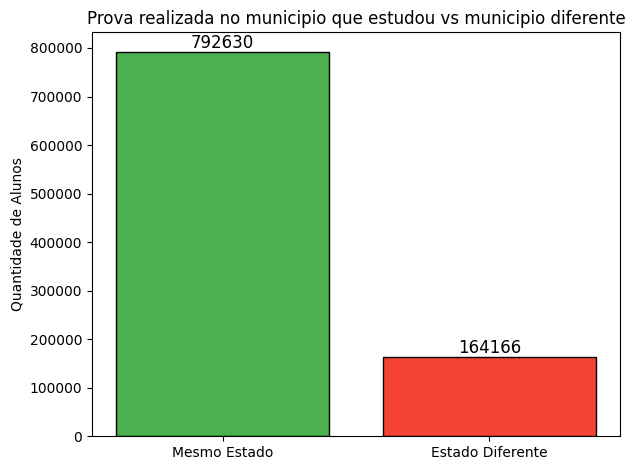

In [101]:
import matplotlib.pyplot as plt

# Contagens
cont_eq = len(df_faltas_EQ)
cont_dif = len(df_faltas_DIF)

# Dados para o gráfico
labels = ['Mesmo Estado', 'Estado Diferente']
valores = [cont_eq, cont_dif]
cores = ['#4caf50', '#f44336']

# Gráfico de barras
plt.bar(labels, valores, color=cores, edgecolor='black')

# Anotar valores acima das barras
for i, v in enumerate(valores):
    plt.text(i, v + max(valores)*0.01, str(v), ha='center', fontsize=12)

plt.title("Prova realizada no municipio que estudou vs municipio diferente")
plt.ylabel("Quantidade de Alunos")
plt.tight_layout()
plt.show()


In [118]:
# para cada prova, quantificar quantidade de faltas

provas = variaveis[2:]
quant_faltas_prova = {}
for prova in provas:
    series = df_faltas_EQ[prova].values
    quant_faltas_prova[prova] = len(series) - np.sum(series)

quant_faltas_prova_porcentagem = {}
for key in quant_faltas_prova:
    series = df_faltas_EQ[key].values
    quant_faltas_prova_porcentagem[key] = quant_faltas_prova[key] / len(series)

descricoes = {var:table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0].split("de")[1].strip() for var in provas}

dict_qfp = {}
dict_qfpp = {}
for key in quant_faltas_prova:
    dict_qfp[descricoes[key]] = quant_faltas_prova[key]
    dict_qfpp[descricoes[key]] = quant_faltas_prova_porcentagem[key]

quant_faltas_prova = dict_qfp
quant_faltas_prova_porcentagem = dict_qfpp


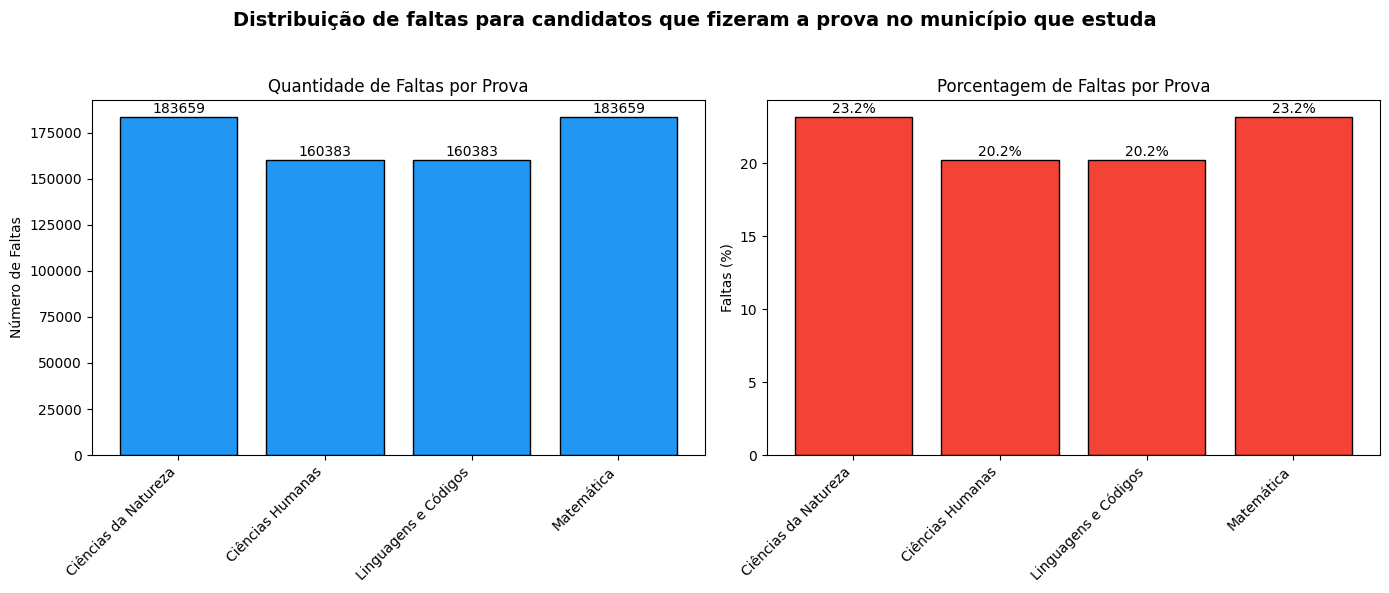

In [121]:
import matplotlib.pyplot as plt

# Dados
labels = list(quant_faltas_prova.keys())
valores_abs = [quant_faltas_prova[k] for k in labels]
valores_pct = [quant_faltas_prova_porcentagem[k] * 100 for k in labels]

# Tamanho da figura
plt.figure(figsize=(14, 6))

# Título geral
plt.suptitle("Distribuição de faltas para candidatos que fizeram a prova no município que estuda",
             fontsize=14, fontweight='bold')

# Gráfico 1 - Quantidade absoluta
plt.subplot(1, 2, 1)
plt.bar(labels, valores_abs, color='#2196f3', edgecolor='black')
plt.title('Quantidade de Faltas por Prova')
plt.ylabel('Número de Faltas')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(valores_abs):
    plt.text(i, v + max(valores_abs)*0.01, str(int(v)), ha='center')

# Gráfico 2 - Porcentagem
plt.subplot(1, 2, 2)
plt.bar(labels, valores_pct, color='#f44336', edgecolor='black')
plt.title('Porcentagem de Faltas por Prova')
plt.ylabel('Faltas (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(valores_pct):
    plt.text(i, v + max(valores_pct)*0.01, f'{v:.1f}%', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [122]:
# para cada prova, quantificar quantidade de faltas

provas = variaveis[2:]
quant_faltas_prova = {}
for prova in provas:
    series = df_faltas_DIF[prova].values
    quant_faltas_prova[prova] = len(series) - np.sum(series)

quant_faltas_prova_porcentagem = {}
for key in quant_faltas_prova:
    series = df_faltas_DIF[key].values
    quant_faltas_prova_porcentagem[key] = quant_faltas_prova[key] / len(series)

descricoes = {var:table_dict_microdados[table_dict_microdados["Nome da variavel"] == var]["Descricao"].values[0].split("de")[1].strip() for var in provas}

dict_qfp = {}
dict_qfpp = {}
for key in quant_faltas_prova:
    dict_qfp[descricoes[key]] = quant_faltas_prova[key]
    dict_qfpp[descricoes[key]] = quant_faltas_prova_porcentagem[key]

quant_faltas_prova = dict_qfp
quant_faltas_prova_porcentagem = dict_qfpp


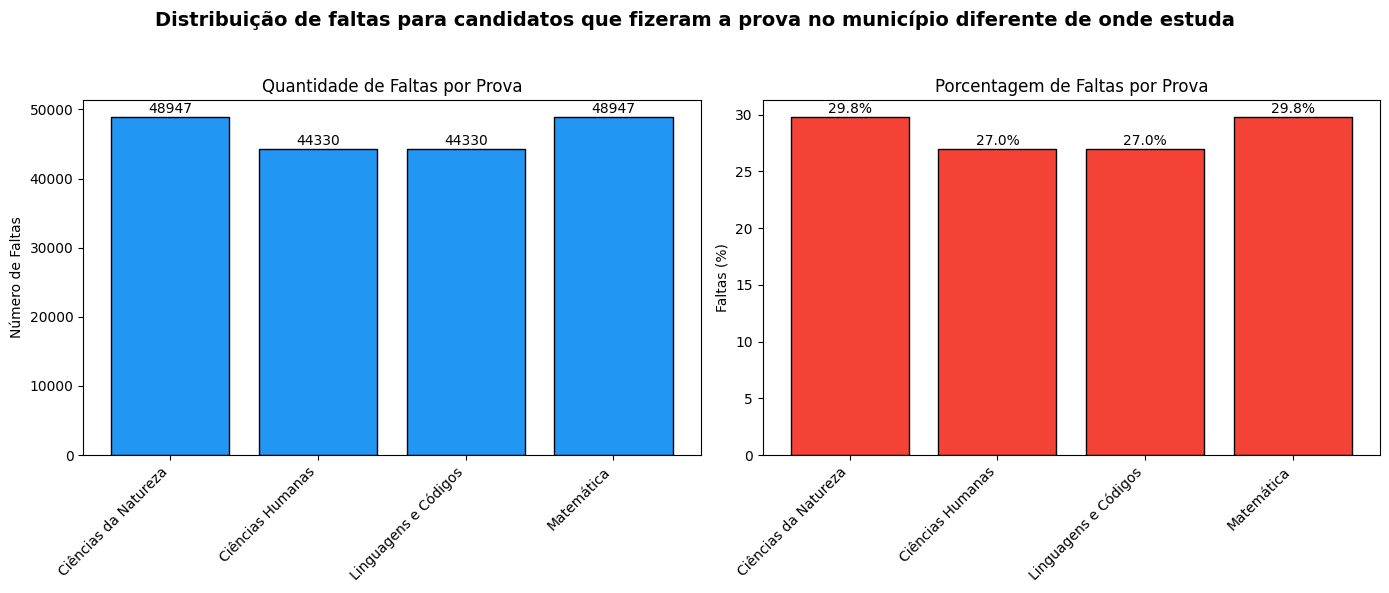

In [123]:
import matplotlib.pyplot as plt

# Dados
labels = list(quant_faltas_prova.keys())
valores_abs = [quant_faltas_prova[k] for k in labels]
valores_pct = [quant_faltas_prova_porcentagem[k] * 100 for k in labels]

# Tamanho da figura
plt.figure(figsize=(14, 6))

# Título geral
plt.suptitle("Distribuição de faltas para candidatos que fizeram a prova no município diferente de onde estuda",
             fontsize=14, fontweight='bold')

# Gráfico 1 - Quantidade absoluta
plt.subplot(1, 2, 1)
plt.bar(labels, valores_abs, color='#2196f3', edgecolor='black')
plt.title('Quantidade de Faltas por Prova')
plt.ylabel('Número de Faltas')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(valores_abs):
    plt.text(i, v + max(valores_abs)*0.01, str(int(v)), ha='center')

# Gráfico 2 - Porcentagem
plt.subplot(1, 2, 2)
plt.bar(labels, valores_pct, color='#f44336', edgecolor='black')
plt.title('Porcentagem de Faltas por Prova')
plt.ylabel('Faltas (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(valores_pct):
    plt.text(i, v + max(valores_pct)*0.01, f'{v:.1f}%', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
